In [906]:
#loading all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
import scipy
from scipy.stats import norm
#from pylab import reParams
import urllib
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import statistics as stats


In [907]:
warnings.filterwarnings('ignore')
%matplotlib inline

Reading datasets - Mushrooms in ireland 

In [908]:
output_in_income_url = 'AEA01.20211220T181206.csv'

In [909]:
live_stock_df = pd.read_csv(output_in_income_url)

Reading datasets - Euro to Dollar conversion rate

In [910]:
euro_to_dollar_rates = 'Euro_To_dollar.csv'

In [911]:
rates_df = pd.read_csv(euro_to_dollar_rates)

Checking the data

In [912]:
rates_df.head(10)

,Year,Rate,Unnamed: 2
0,"December 31, 1999",1.066116,NaN
1,"December 31, 2000",0.923498,NaN
2,"December 31, 2001",0.895969,NaN
3,"December 31, 2002",0.942468,NaN
4,"December 31, 2003",1.134134,NaN
5,"December 31, 2004",1.244143,NaN
6,"December 31, 2005",1.246376,NaN
7,"December 31, 2006",1.256316,NaN
8,"December 31, 2007",1.370412,NaN
9,"December 31, 2008",1.471366,NaN


In [913]:
live_stock_df.head()

,Statistic,Year,State,UNIT,VALUE
0,All Livestock,1990,State,Euro Million,2201.9
1,All Livestock,1991,State,Euro Million,2114.0
2,All Livestock,1992,State,Euro Million,2262.5
3,All Livestock,1993,State,Euro Million,2449.6
4,All Livestock,1994,State,Euro Million,2319.3


In [914]:
live_stock_df.columns

Index(['Statistic', 'Year', 'State', 'UNIT', 'VALUE'], dtype='object')

In [915]:
live_stock_df.Year.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype=int64)

In [916]:
live_stock_df.shape

(1728, 5)

Cleaning the dataset to leave only Mushrooms

In [917]:
mushroom_value =  live_stock_df[live_stock_df['Statistic']=='Crops - Mushrooms']

mushroom_value=mushroom_value.dropna()

In [918]:
mushroom_value.shape

(31, 5)

In [919]:
mushroom_size = mushroom_value.shape[0]
mushroom_size

31

In [920]:
mushroom_value.head(5)

,Statistic,Year,State,UNIT,VALUE
512,Crops - Mushrooms,1990,State,Euro Million,57.1
513,Crops - Mushrooms,1991,State,Euro Million,63.5
514,Crops - Mushrooms,1992,State,Euro Million,64.8
515,Crops - Mushrooms,1993,State,Euro Million,68.1
516,Crops - Mushrooms,1994,State,Euro Million,76.3


In [921]:
mushroom_value.head()

,Statistic,Year,State,UNIT,VALUE
512,Crops - Mushrooms,1990,State,Euro Million,57.1
513,Crops - Mushrooms,1991,State,Euro Million,63.5
514,Crops - Mushrooms,1992,State,Euro Million,64.8
515,Crops - Mushrooms,1993,State,Euro Million,68.1
516,Crops - Mushrooms,1994,State,Euro Million,76.3


Checking rates table

In [922]:
rates_df.head()

,Year,Rate,Unnamed: 2
0,"December 31, 1999",1.066116,NaN
1,"December 31, 2000",0.923498,NaN
2,"December 31, 2001",0.895969,NaN
3,"December 31, 2002",0.942468,NaN
4,"December 31, 2003",1.134134,NaN


In [923]:
rates_size = rates_df.shape[0]
rates_size

24

Creating new column with the value converted to US Dollar

In [924]:
rate = []
result = []

for i in range(mushroom_size):
    mYear = int(mushroom_value.iloc[i]["Year"])
    
    if mYear < 1999:
        mYear = 1999
    
    for j in range(rates_size):
        rYear = int(rates_df.iloc[j]["Year"].replace('December 31, ', '').replace('January 23, ', '').strip())

        if rYear == mYear:
            rate.append(rates_df.iloc[j]["Rate"])
            result.append(rates_df.iloc[j]["Rate"]*mushroom_value.iloc[i]["VALUE"])
            break

mushroom_value["Rate"] = rate               
mushroom_value["US$"] = result   

In [925]:
mushroom_value= mushroom_value.rename(columns = {"VALUE":"EUR$"})

mushroom_value

,Statistic,Year,State,UNIT,EUR$,Rate,US$
512,Crops - Mushrooms,1990,State,Euro Million,57.1,1.066116,60.875224
513,Crops - Mushrooms,1991,State,Euro Million,63.5,1.066116,67.698366
514,Crops - Mushrooms,1992,State,Euro Million,64.8,1.066116,69.084317
515,Crops - Mushrooms,1993,State,Euro Million,68.1,1.066116,72.602500
516,Crops - Mushrooms,1994,State,Euro Million,76.3,1.066116,81.344651
517,Crops - Mushrooms,1995,State,Euro Million,78.0,1.066116,83.157048
518,Crops - Mushrooms,1996,State,Euro Million,92.3,1.066116,98.402507
519,Crops - Mushrooms,1997,State,Euro Million,101.9,1.066116,108.637220
520,Crops - Mushrooms,1998,State,Euro Million,106.7,1.066116,113.754577
521,Crops - Mushrooms,1999,State,Euro Million,111.4,1.066116,118.765322


Ploting the value in euros and dollar

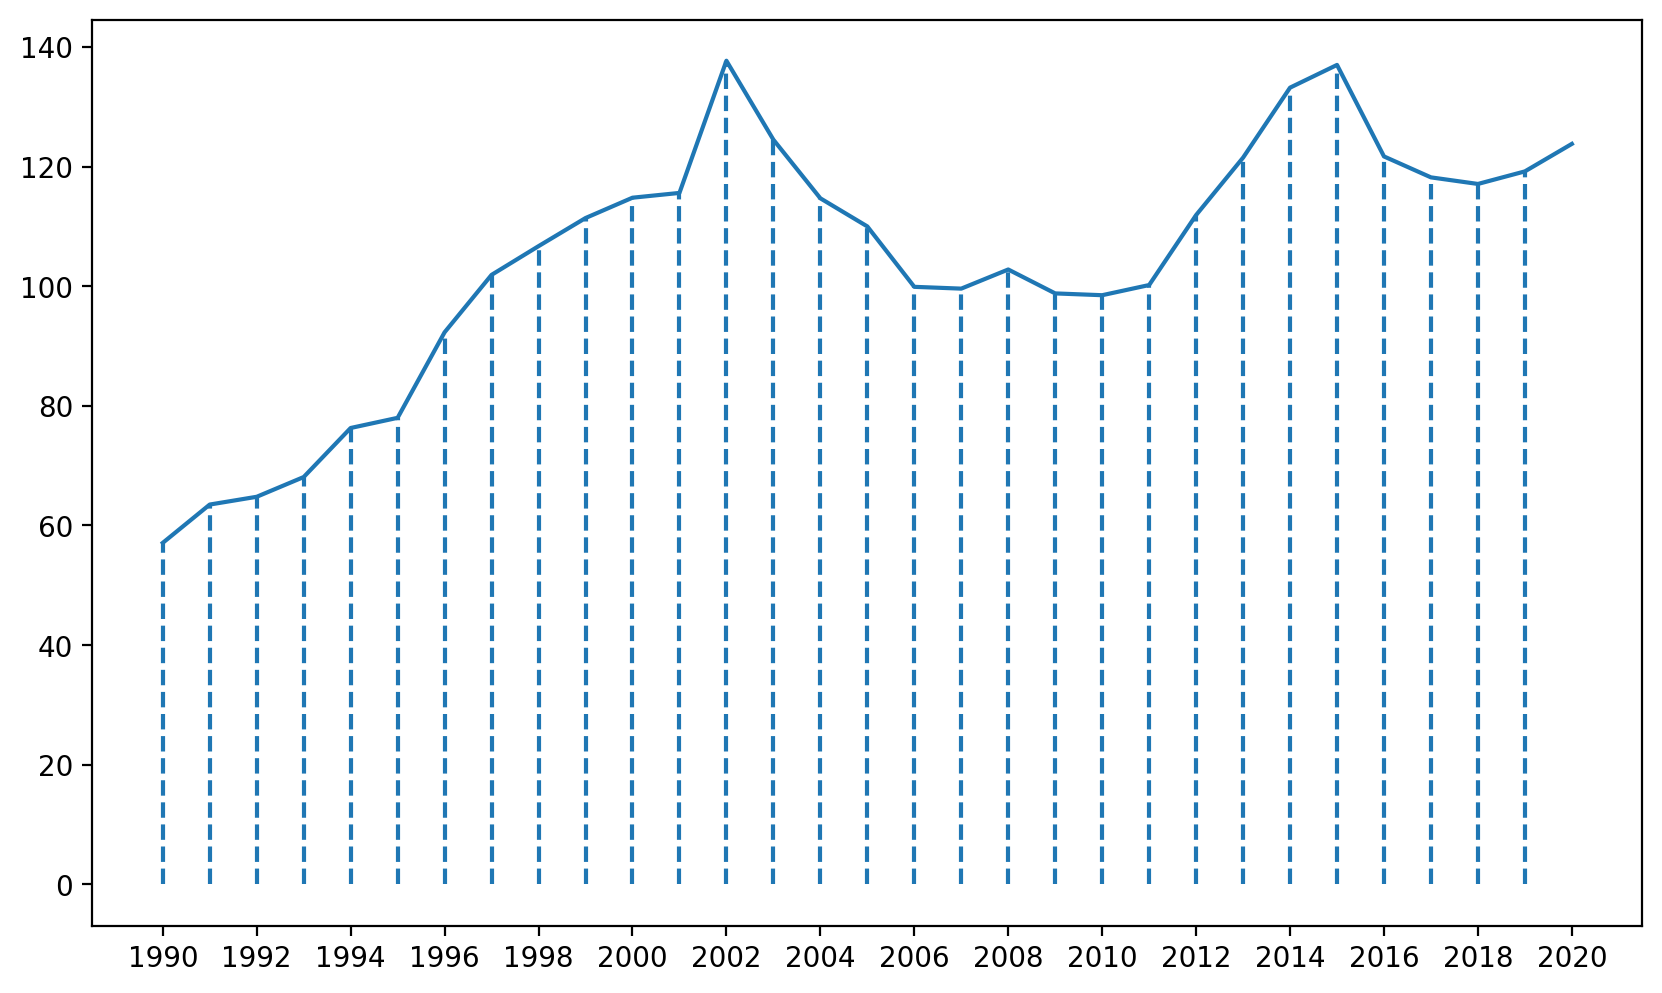

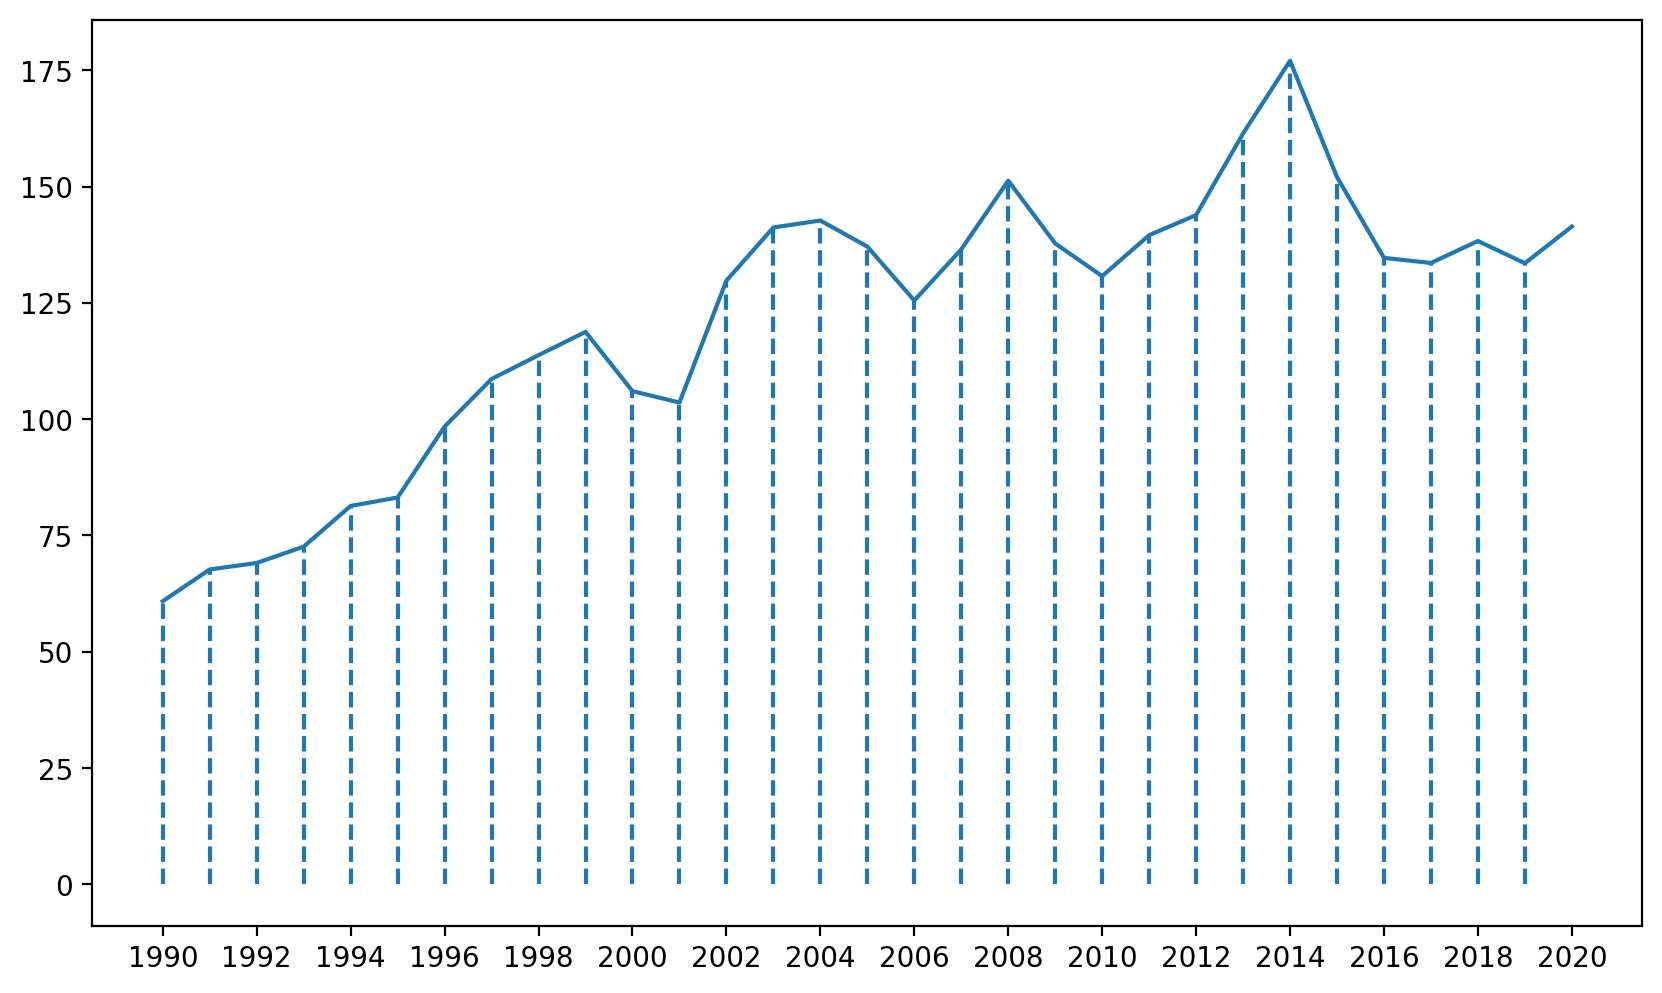

In [926]:
#Revenue in Euros
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(mushroom_value["Year"],mushroom_value["EUR$"])
plt.xticks(np.arange(min(mushroom_value['Year']), max(mushroom_value['Year'])+1, 2.0))
for year in range (1990,2020):

    plt.vlines(ls="--",x=year, ymax=mushroom_value[mushroom_value['Year'] ==  year]["EUR$"].tolist()[0], ymin=0)

plt.show()    


#Revenue in US Dollars
#We don't have a deep decrease in revenue because the euro x dollar ratio increased
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(mushroom_value["Year"],mushroom_value["US$"])
plt.xticks(np.arange(min(mushroom_value['Year']), max(mushroom_value['Year'])+1, 2.0))
for year in range (1990,2020):

    plt.vlines(ls="--",x=year, ymax=mushroom_value[mushroom_value['Year'] ==  year]["US$"].tolist()[0], ymin=0)        
        


plt.show()

In [927]:
mushroom_value[mushroom_value['Year'] ==  2002]["US$"].tolist()[0]

129.77784359999998

In [928]:
# list all the different statistics in this dataset
mushroom_value.Statistic.unique()

array(['Crops - Mushrooms'], dtype=object)

Checking mushroom statistics

In [929]:
display(mushroom_value.head())
display(mushroom_value.isna().sum())
display(mushroom_value.describe())
display(mushroom_value.count())

,Statistic,Year,State,UNIT,EUR$,Rate,US$
512,Crops - Mushrooms,1990,State,Euro Million,57.1,1.066116,60.875224
513,Crops - Mushrooms,1991,State,Euro Million,63.5,1.066116,67.698366
514,Crops - Mushrooms,1992,State,Euro Million,64.8,1.066116,69.084317
515,Crops - Mushrooms,1993,State,Euro Million,68.1,1.066116,72.602500
516,Crops - Mushrooms,1994,State,Euro Million,76.3,1.066116,81.344651


Statistic    0
Year         0
State        0
UNIT         0
EUR$         0
Rate         0
US$          0
dtype: int64

,Year,EUR$,Rate,US$
count,31.000000,31.000000,31.000000,31.000000
mean,2005.000000,104.541935,1.161078,121.672207
std,9.092121,21.594548,0.146669,29.620943
min,1990.000000,57.100000,0.895969,60.875224
25%,1997.500000,98.650000,1.066116,104.795793
50%,2005.000000,110.000000,1.120129,133.519377
75%,2012.500000,118.700000,1.271006,140.374362
max,2020.000000,137.700000,1.471366,177.044778


Statistic    31
Year         31
State        31
UNIT         31
EUR$         31
Rate         31
US$          31
dtype: int64

In [930]:
mushroom_value

,Statistic,Year,State,UNIT,EUR$,Rate,US$
512,Crops - Mushrooms,1990,State,Euro Million,57.1,1.066116,60.875224
513,Crops - Mushrooms,1991,State,Euro Million,63.5,1.066116,67.698366
514,Crops - Mushrooms,1992,State,Euro Million,64.8,1.066116,69.084317
515,Crops - Mushrooms,1993,State,Euro Million,68.1,1.066116,72.602500
516,Crops - Mushrooms,1994,State,Euro Million,76.3,1.066116,81.344651
517,Crops - Mushrooms,1995,State,Euro Million,78.0,1.066116,83.157048
518,Crops - Mushrooms,1996,State,Euro Million,92.3,1.066116,98.402507
519,Crops - Mushrooms,1997,State,Euro Million,101.9,1.066116,108.637220
520,Crops - Mushrooms,1998,State,Euro Million,106.7,1.066116,113.754577
521,Crops - Mushrooms,1999,State,Euro Million,111.4,1.066116,118.765322


Histogram

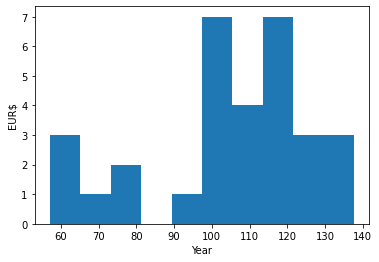

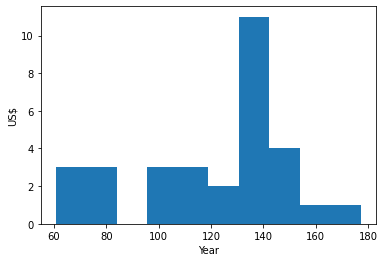

In [931]:
plt.hist(mushroom_value['EUR$'])
plt.xlabel('Year')
plt.ylabel('EUR$')
plt.show()

plt.hist(mushroom_value['US$'])
plt.xlabel('Year')
plt.ylabel('US$')
plt.show()

Boxplot

Text(0.5, 0, '')

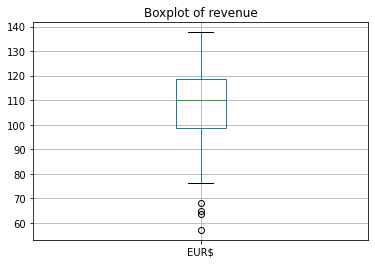

In [932]:
#looking at revenue in a boxplot to note outliers verses normal spread. Significant outliers either side
mushroom_value.boxplot('EUR$')
plt.title('Boxplot of revenue')
plt.xlabel('')


Text(0.5, 0, '')

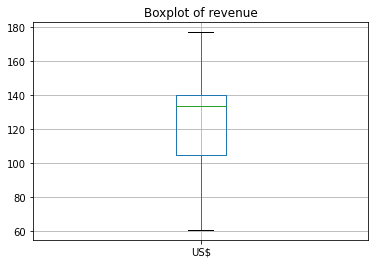

In [933]:
mushroom_value.boxplot('US$')
plt.title('Boxplot of revenue')
plt.xlabel('')

In [934]:
mushroom_value.describe()

,Year,EUR$,Rate,US$
count,31.000000,31.000000,31.000000,31.000000
mean,2005.000000,104.541935,1.161078,121.672207
std,9.092121,21.594548,0.146669,29.620943
min,1990.000000,57.100000,0.895969,60.875224
25%,1997.500000,98.650000,1.066116,104.795793
50%,2005.000000,110.000000,1.120129,133.519377
75%,2012.500000,118.700000,1.271006,140.374362
max,2020.000000,137.700000,1.471366,177.044778


fixing variables for normal distribution plot

In [935]:
mean = stats.mean(mushroom_value["EUR$"])
sd = stats.stdev(mushroom_value["EUR$"])
revenue = mushroom_value["EUR$"]

mean2 = stats.mean(mushroom_value["US$"])
sd2 = stats.stdev(mushroom_value["US$"])
revenue2 = mushroom_value["US$"]


Normal distribution

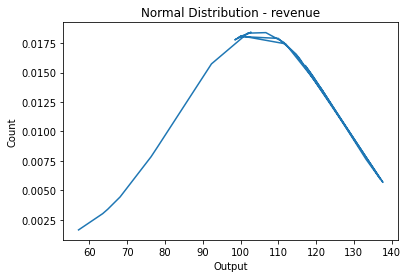

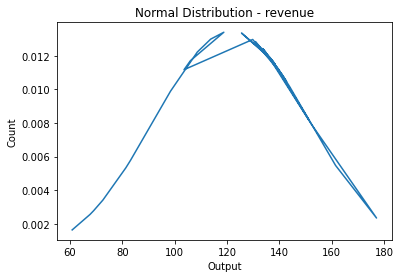

In [936]:

plt.plot(revenue,norm.pdf(revenue,mean,sd))
plt.title("Normal Distribution - revenue")
plt.xlabel("Output")
plt.ylabel("Count")
plt.show()

plt.plot(revenue2,norm.pdf(revenue2,mean2,sd2))
plt.title("Normal Distribution - revenue")
plt.xlabel("Output")
plt.ylabel("Count")
plt.show()

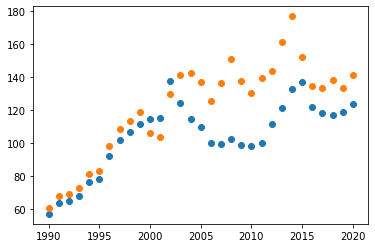

In [937]:
#basic scatter plot to see potential correlation between year and revenue
plt.scatter(mushroom_value["Year"],mushroom_value["EUR$"])
plt.scatter(mushroom_value["Year"],mushroom_value["US$"])

Correlation map displaying high correlation year and currency as well as between currencies (as expected)

<AxesSubplot:>

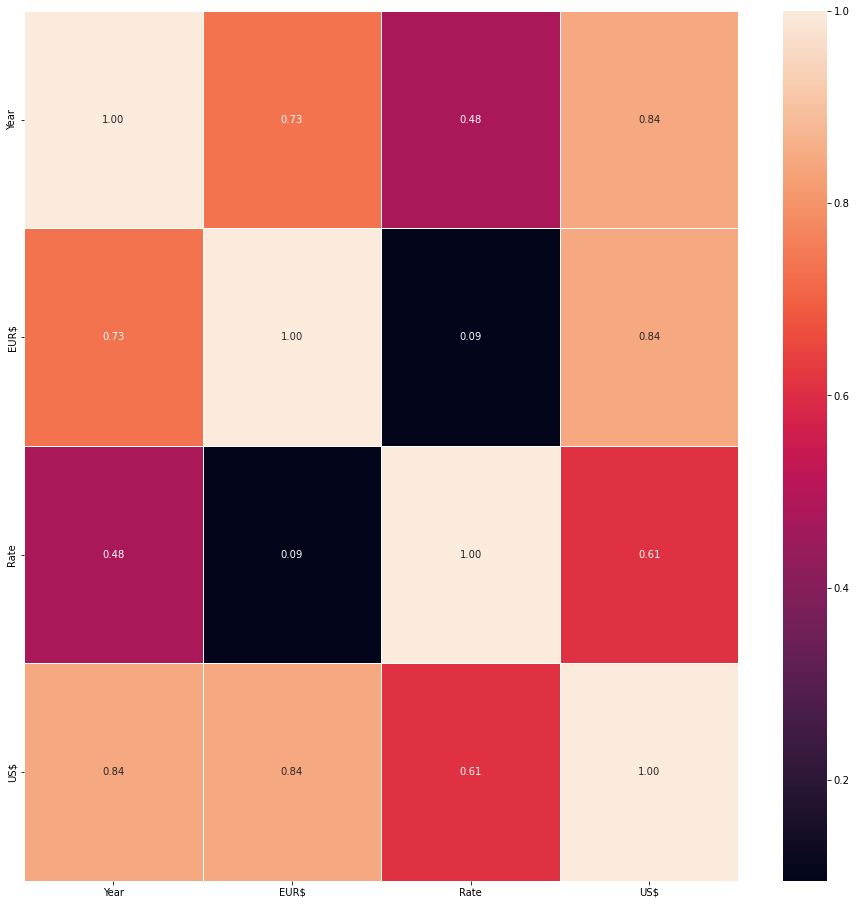

In [938]:
#plotting large correlation heatmap to see how variables are linked. 
#year and currency correlation (0.84) is the highest 
plt.figure(figsize = (16,16))
sns.heatmap(mushroom_value.corr(), annot = True, fmt = '.2f', linewidths = 0.5)

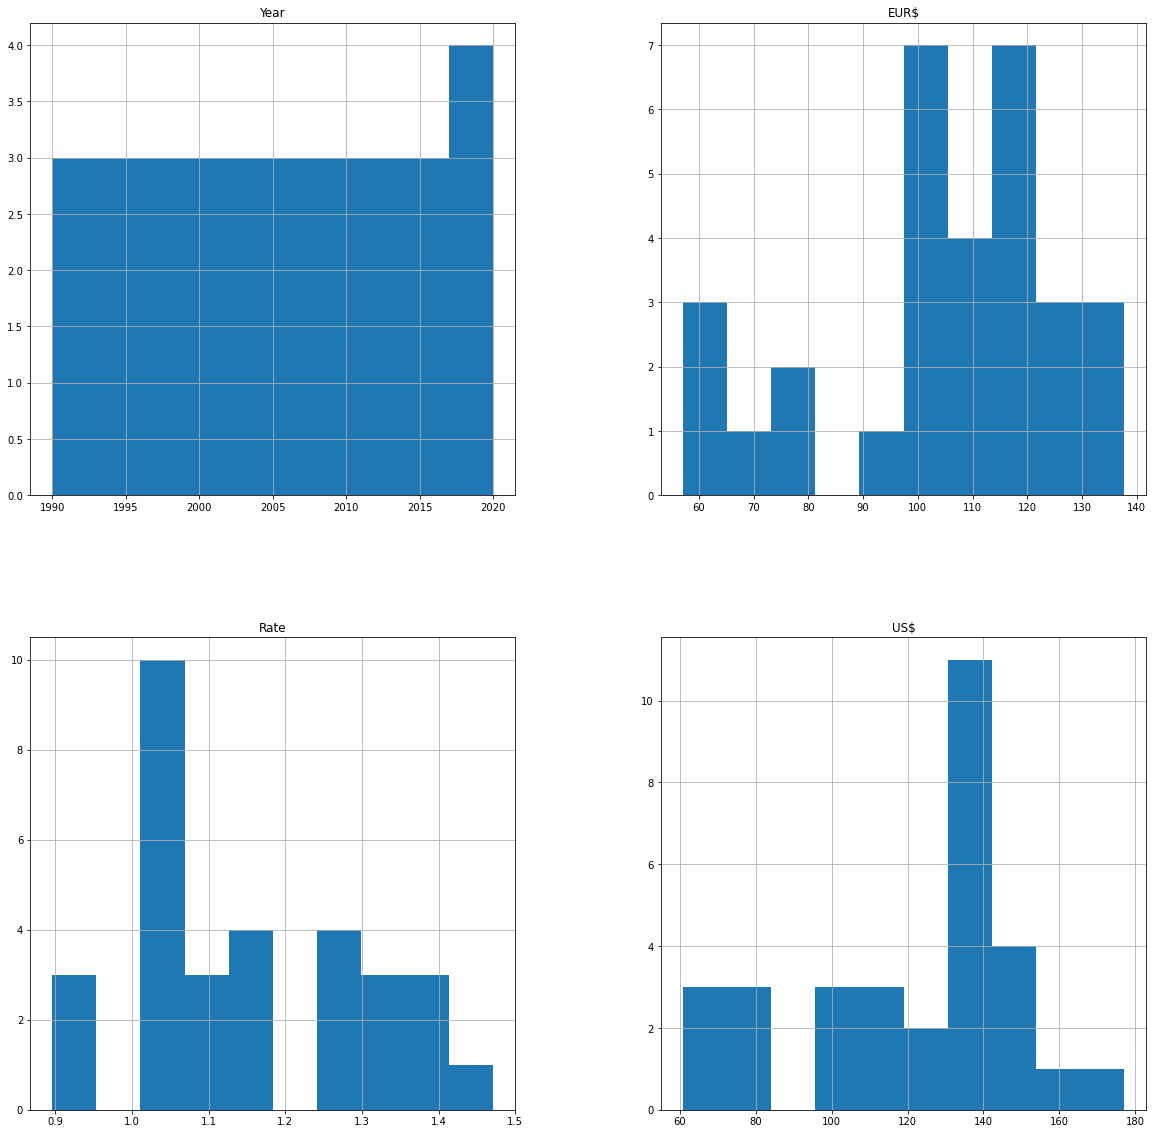

In [939]:
# histograms of each variable 
fig = plt.figure(figsize = (20,20))             
ax = fig.gca()                                
mushroom_value.hist(ax = ax)                          
plt.show()

Removing unnecessary columns and making copy of main df before I try standardize it, just in case

In [940]:

mushroom_value.drop(['Statistic'], axis=1, inplace=True)
mushroom_value.drop(['State'], axis=1, inplace=True)
mushroom_value.drop(['UNIT'], axis=1, inplace=True)

mushroom_value_scaled = mushroom_value.copy()

In [941]:
mushroom_value_scaled

,Year,EUR$,Rate,US$
512,1990,57.1,1.066116,60.875224
513,1991,63.5,1.066116,67.698366
514,1992,64.8,1.066116,69.084317
515,1993,68.1,1.066116,72.602500
516,1994,76.3,1.066116,81.344651
517,1995,78.0,1.066116,83.157048
518,1996,92.3,1.066116,98.402507
519,1997,101.9,1.066116,108.637220
520,1998,106.7,1.066116,113.754577
521,1999,111.4,1.066116,118.765322


Applying standard scalar to copy of main df to bring all variables into a similar scale

In [942]:

scaler = StandardScaler()

mushroom_value_scaled = pd.DataFrame(scaler.fit_transform(mushroom_value),columns=mushroom_value.columns)

mushroom_value_scaled.head()

,Year,EUR$,Rate,US$
0,-1.677051,-2.233256,-0.65816,-2.086428
1,-1.565248,-1.931986,-0.65816,-1.852272
2,-1.453444,-1.870790,-0.65816,-1.804709
3,-1.341641,-1.715448,-0.65816,-1.683972
4,-1.229837,-1.329446,-0.65816,-1.383959


Creating function of a loop to go through any column of choice and minus the first value from the fourth value.
Idea behind this is to create a variable when there is an increase or decrease in the chosen variable across that time period. This will allow me to use 2020 data to try predict as far ahead as 2023

In [943]:
def triennial_delta(df_temp,column_header):
    #creating two empty variables that will be populated in this function
    column_header_predictor=[]
    pos_neg_allocation = []
    #stopping loop when it gets to 3rd last row as it needs 3 rows ahead for calculation
    for row in range(len(df_temp[column_header])-3):
        calculated_value = df_temp.iloc[row+3][column_header]-df_temp.iloc[row][column_header]
        #if statement for what to insert if difference is positive or not positive
        if calculated_value <= 0:
            pos_neg_allocation.insert(row,0)
        else:
            pos_neg_allocation.insert(row,1)
        #populating the last 3 cells in pos_negallocation with none so that the df is right size as we have no values for it  
    for i in range(3):
        pos_neg_allocation.append(None)
    #adding the predictor column to the df
    df_temp["predictor"] = pos_neg_allocation
       
    return df_temp
    

# Prediction in euros

The question we want to answer is the following:
Will the revenue increse in the next few years?

In [944]:
#making another copy of main df scaled in case this all goes wrong
mushroom_value_scaled_temp = mushroom_value_scaled.copy()

In [945]:
#applying function to EUR$ column to get new column for target outcomes for ML algorithms- checking tail to see if it worked
mushroom_value_scaled_temp = triennial_delta(mushroom_value_scaled_temp,"EUR$")
mushroom_value_scaled_temp.tail()

,Year,EUR$,Rate,US$,predictor
26,1.229837,0.807689,-0.377852,0.446001,0.0
27,1.341641,0.642932,-0.215042,0.408377,1.0
28,1.453444,0.591152,0.138150,0.570508,NaN
29,1.565248,0.690006,-0.283809,0.406571,NaN
30,1.677051,0.906544,-0.130819,0.677180,NaN


In [946]:
# also checking head to be 100% 
mushroom_value_scaled_temp.head()

,Year,EUR$,Rate,US$,predictor
0,-1.677051,-2.233256,-0.65816,-2.086428,1.0
1,-1.565248,-1.931986,-0.65816,-1.852272,1.0
2,-1.453444,-1.870790,-0.65816,-1.804709,1.0
3,-1.341641,-1.715448,-0.65816,-1.683972,1.0
4,-1.229837,-1.329446,-0.65816,-1.383959,1.0


In [947]:
#creating new df without predictor column for x_test
X = mushroom_value_scaled_temp.drop(["predictor"],axis=1)

#creating df last_3_rows to store the last 3 rows which will be used to predict future years based on algorithms
last_3_rows = X.tail(3)

#dropping last 3 rows from X as they aren't going to be used yet
X = X.drop(X.index[[-1,-2,-3]])


In [948]:
#creating df y with target answers, dropping last 3 rows but storing for later use
y = mushroom_value_scaled_temp["predictor"]
y = y.drop(y.index[[-1,-2,-3]])

In [949]:
#splitting data into X and Y training and testing at a 0.3 split- random state set for reproducability
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state= 7)

#making sure shapes make sense
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(X.shape)
print(y.shape)

Y_test.head(6)

(19, 4)
(9, 4)
(19,)
(9,)
(28, 4)
(28,)


2     1.0
9     1.0
1     1.0
5     1.0
17    0.0
16    0.0
Name: predictor, dtype: float64

In [950]:
#Storing KNN classifier as clf and fitting to training data
clf = sklearn.neighbors.KNeighborsClassifier()
clf.fit(X_train,Y_train)
print(clf)

KNeighborsClassifier()


In [951]:
#performing KNN classification and looking at classification report
#recall = 56% accuracy
y_expect = Y_test
y_pred = clf.predict(X_test)

print(metrics.classification_report(y_expect, y_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.25      0.33         4
         1.0       0.57      0.80      0.67         5

    accuracy                           0.56         9
   macro avg       0.54      0.53      0.50         9
weighted avg       0.54      0.56      0.52         9



In [952]:
#Revenue - KNN
#applying KNN algorithm to last 3 rows that were dropped earlier to predict whether there is an increase or not in revenue for 2021/2022/2023

actual_predictions =  clf.predict(last_3_rows)
print(actual_predictions)


[0. 0. 0.]


It predics no increse from 2019 for 2022
It predics no increse from 2020 for 2023
It predics no increse from 2021 for 2024

In [953]:
#now performing Logistic regression in revenue predictions

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

LogisticRegression()

In [954]:
#creating confusion matrix to show Success and error types in logistic regression
#1 True positives, 4 true negatives, 3 false positive, 1 false negative 

y_pred_log_reg = log_reg.predict(X_test)
confusion_matrix(Y_test, y_pred_log_reg)

array([[1, 3],
       [1, 4]], dtype=int64)

In [955]:
#Revenue - Log Reg - using the trained logistic regression algorithm on the last 3 rows of data to predict future revenue changes

actual_predictions =  log_reg.predict(last_3_rows)
print(actual_predictions)

#### It predics no increse from 2019 for 2022
#### It predics no increse from 2020 for 2023
#### It predics no increse from 2021 for 2024

[0. 0. 0.]


In [956]:
#Applying PCA to data, using top 2 components, 
pca = PCA(n_components = 2)

# Performing Pca on the 3 dfs.
PCA_X_train = pca.fit_transform(X_train)
PCA_X_test = pca.transform(X_test)
PCA_rows = pca.transform(last_3_rows)
 
# Store the explained variance
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[0.69245027 0.26766411]


[0.69245027 0.26766411]


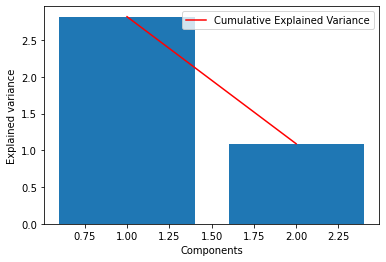

In [957]:
#graphing variance of the 2 components chosen
plt.bar(range(1,len(pca.explained_variance_ ) + 1), pca.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1, len(pca.explained_variance_ ) + 1), pca.explained_variance_,
         c = 'red',
         label = "Cumulative Explained Variance")
plt.legend(loc = 'best')

print(explained_variance)

In [958]:
# Repeating logistic regression steps, but now on the 2 principal components as opposed to whole df
log_reg.fit(PCA_X_train, Y_train)
y_pred_log_reg = log_reg.predict(PCA_X_test)
confusion_matrix(Y_test, y_pred_log_reg)

array([[1, 3],
       [1, 4]], dtype=int64)

In [959]:
#using trained logistic regression model on data to predict future revenue changes
actual_predictions =  log_reg.predict(PCA_rows)
print(actual_predictions)

[0. 0. 0.]


# Predicition in US Dollars

In [960]:
#making another copy of main df scaled in case this all goes wrong
mushroom_value_scaled_temp = mushroom_value_scaled.copy()

#applying function to US$ column to get new column for target outcomes for ML algorithms- checking tail to see if it worked
mushroom_value_scaled_temp = triennial_delta(mushroom_value_scaled_temp,"US$")
mushroom_value_scaled_temp.tail()

# also checking head to be 100% 
mushroom_value_scaled_temp.head()

#creating new df without predictor column for x_test
X = mushroom_value_scaled_temp.drop(["predictor"],axis=1)

#creating df last_3_rows to store the last 3 rows which will be used to predict future years based on algorithms
last_3_rows = X.tail(3)

#dropping last 3 rows from X as they aren't going to be used yet
X = X.drop(X.index[[-1,-2,-3]])

#creating df y with target answers, dropping last 3 rows but storing for later use
y = mushroom_value_scaled_temp["predictor"]
y = y.drop(y.index[[-1,-2,-3]])

#splitting data into X and Y training and testing at a 0.3 split- random state set for reproducability
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state= 7)

#making sure shapes make sense
print("X_train.shape = ",  X_train.shape)
print("X_test.shape = ", X_test.shape)
print("Y_train.shape = ", Y_train.shape)
print("Y_test.shape = ", Y_test.shape)
print("X.shape = ", X.shape)
print("y.shape = ", y.shape)

Y_test.head(6)


#Storing KNN classifier as clf and fitting to training data
clf = sklearn.neighbors.KNeighborsClassifier()
clf.fit(X_train,Y_train)
print(clf)


#perfirming KNN classification and looking at classification report
#recall = 67% accuracy
y_expect = Y_test
y_pred = clf.predict(X_test)

print(metrics.classification_report(y_expect, y_pred))


#Revenue - KNN
#applying KNN algorithm to last 3 rows that were dropped earlier to predict whether there is an increase or not in revenue for 2021/2022/2023

actual_predictions =  clf.predict(last_3_rows)
print(actual_predictions)

#### It predics an increse from 2019 for 2022
#### It predics an increse from 2020 for 2023
#### It predics an increse from 2021 for 2024

X_train.shape =  (19, 4)
X_test.shape =  (9, 4)
Y_train.shape =  (19,)
Y_test.shape =  (9,)
X.shape =  (28, 4)
y.shape =  (28,)
KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       1.00      0.25      0.40         4
         1.0       0.62      1.00      0.77         5

    accuracy                           0.67         9
   macro avg       0.81      0.62      0.58         9
weighted avg       0.79      0.67      0.61         9

[1. 1. 1.]


It predics an increse from 2019 for 2022, 
It predics an increse from 2020 for 2023, 
It predics an increse from 2021 for 2024

We need to note here that prediction is no increase in euros but because of the currency exchange rate, we will see an increase in revenue when converted to dollars

[0.69245027 0.26766411]
[0.69245027 0.26766411]
[1. 0. 0.]


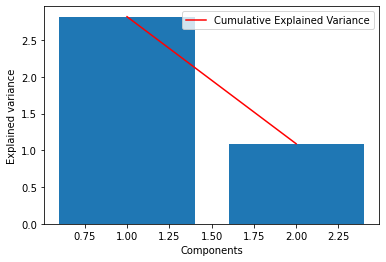

In [961]:
#Applying PCA to data, using top 2 components, 
pca = PCA(n_components = 2)

# Performing Pca on the 3 dfs.
PCA_X_train = pca.fit_transform(X_train)
PCA_X_test = pca.transform(X_test)
PCA_rows = pca.transform(last_3_rows)
 
# Store the explained variance
explained_variance = pca.explained_variance_ratio_

print(explained_variance)


#graphing variance of the 2 components chosen
plt.bar(range(1,len(pca.explained_variance_ ) + 1), pca.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1, len(pca.explained_variance_ ) + 1), pca.explained_variance_,
         c = 'red',
         label = "Cumulative Explained Variance")
plt.legend(loc = 'best')

print(explained_variance)


# Repeating logistic regression steps, but now on the 2 principal components as opposed to whole df
log_reg.fit(PCA_X_train, Y_train)
y_pred_log_reg = log_reg.predict(PCA_X_test)
confusion_matrix(Y_test, y_pred_log_reg)

#using trained logistic regression model on data to predict future revenue changes
actual_predictions =  log_reg.predict(PCA_rows)
print(actual_predictions)

# US data - Mushrooms ########################

In [962]:
us_mushroom_dataset_name = 'US_data_mushroom.csv'
us_mushroom_df = pd.read_csv(us_mushroom_dataset_name)
us_mushroom_df.head(10)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,231,United States of America,5510,Production,449,Mushrooms and truffles,1972,1972,tonnes,115212,NaN,Official data
1,QCL,Crops and livestock products,231,United States of America,5510,Production,449,Mushrooms and truffles,1973,1973,tonnes,115213,NaN,Official data
2,QCL,Crops and livestock products,231,United States of America,5510,Production,449,Mushrooms and truffles,1974,1974,tonnes,126775,NaN,Official data
3,QCL,Crops and livestock products,231,United States of America,5510,Production,449,Mushrooms and truffles,1975,1975,tonnes,135660,NaN,Official data
4,QCL,Crops and livestock products,231,United States of America,5510,Production,449,Mushrooms and truffles,1976,1976,tonnes,140529,NaN,Official data
5,QCL,Crops and livestock products,231,United States of America,5510,Production,449,Mushrooms and truffles,1977,1977,tonnes,157454,NaN,Official data
6,QCL,Crops and livestock products,231,United States of America,5510,Production,449,Mushrooms and truffles,1978,1978,tonnes,180848,NaN,Official data
7,QCL,Crops and livestock products,231,United States of America,5510,Production,449,Mushrooms and truffles,1979,1979,tonnes,205930,NaN,Official data
8,QCL,Crops and livestock products,231,United States of America,5510,Production,449,Mushrooms and truffles,1980,1980,tonnes,213200,NaN,Official data
9,QCL,Crops and livestock products,231,United States of America,5510,Production,449,Mushrooms and truffles,1981,1981,tonnes,212990,NaN,Official data


In [963]:
us_mushroom_df.columns

Index(['Domain Code', 'Domain', 'Area Code (FAO)', 'Area', 'Element Code',
       'Element', 'Item Code (FAO)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description'],
      dtype='object')

In [964]:
us_mushroom_df.shape

(49, 14)

In [965]:
us_mushroom_size = us_mushroom_df.shape[0]
us_mushroom_size

49

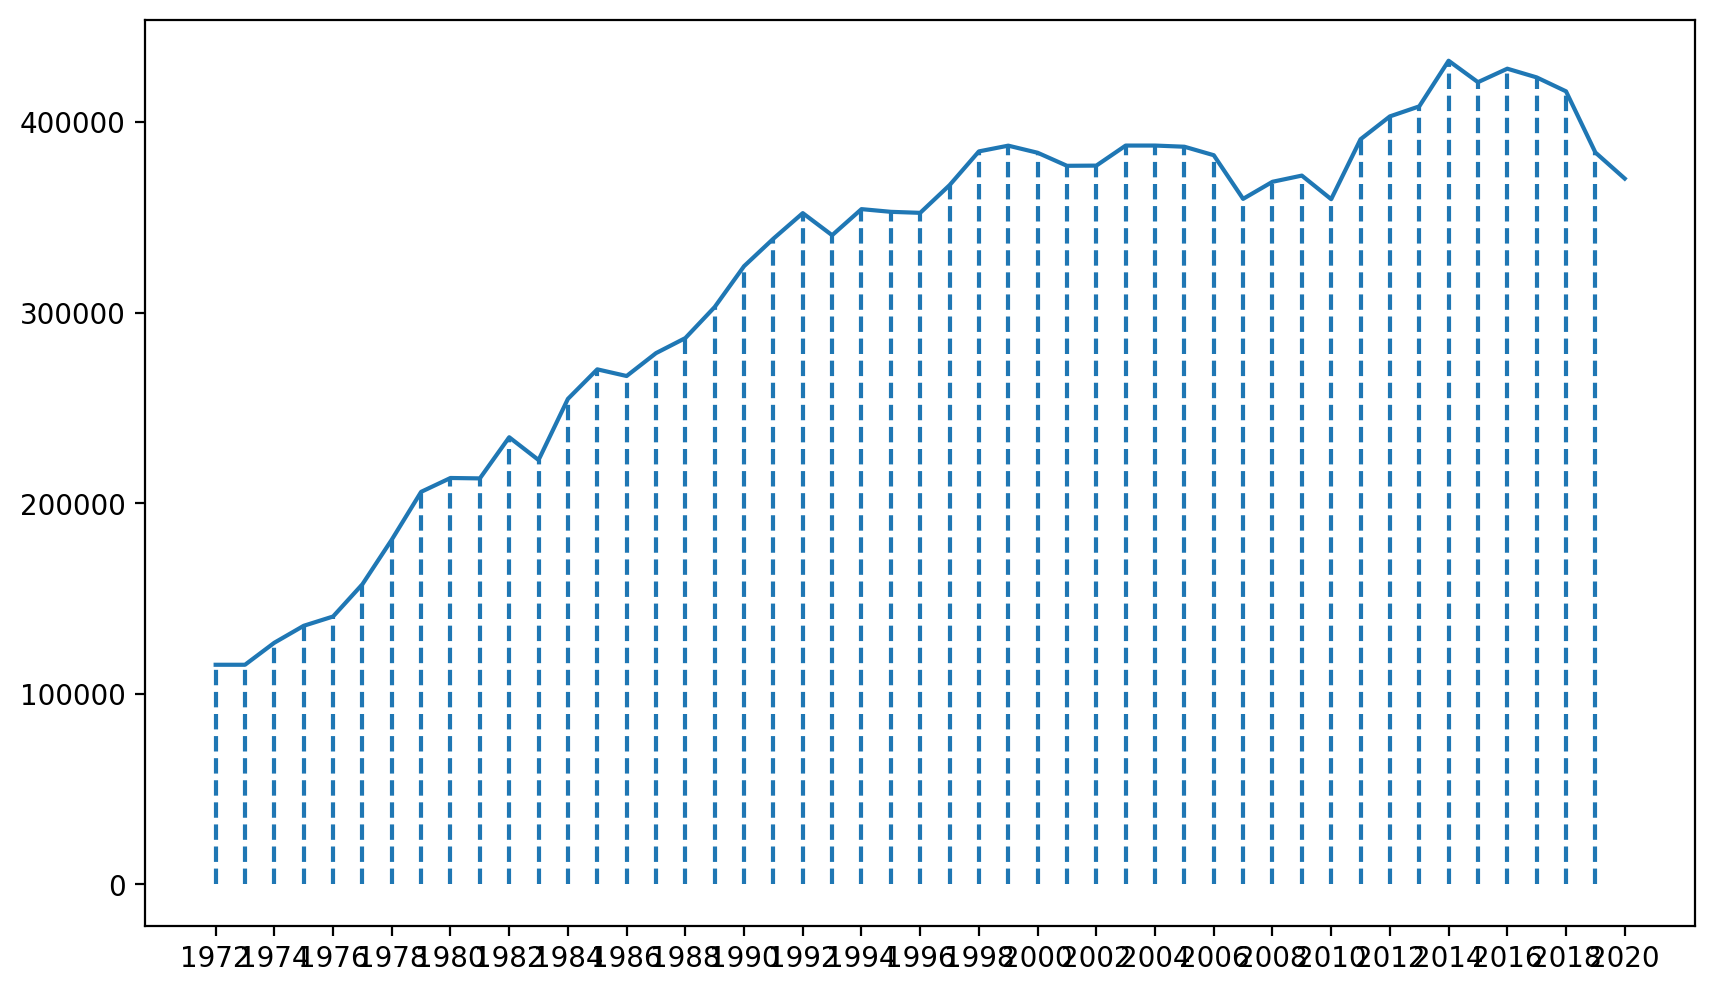

In [966]:
#Revenue in Euros
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(us_mushroom_df["Year"],us_mushroom_df["Value"])
plt.xticks(np.arange(min(us_mushroom_df['Year']), max(us_mushroom_df['Year'])+1, 2.0))
for year in range (1972,2020):
    plt.vlines(ls="--",x=year, ymax=us_mushroom_df[us_mushroom_df['Year'] ==  year]["Value"].tolist()[0], ymin=0)

  
plt.show()    


In [967]:
us_mushroom_df.isna().sum()


Domain Code          0
Domain               0
Area Code (FAO)      0
Area                 0
Element Code         0
Element              0
Item Code (FAO)      0
Item                 0
Year Code            0
Year                 0
Unit                 0
Value                0
Flag                49
Flag Description     0
dtype: int64

In [968]:
us_mushroom_df.describe()

,Area Code (FAO),Element Code,Item Code (FAO),Year Code,Year,Value,Flag
count,49.0,49.0,49.0,49.00000,49.00000,49.000000,0.0
mean,231.0,5510.0,449.0,1996.00000,1996.00000,316194.367347,NaN
std,0.0,0.0,0.0,14.28869,14.28869,94730.482388,NaN
min,231.0,5510.0,449.0,1972.00000,1972.00000,115212.000000,NaN
25%,231.0,5510.0,449.0,1984.00000,1984.00000,254700.000000,NaN
50%,231.0,5510.0,449.0,1996.00000,1996.00000,354250.000000,NaN
75%,231.0,5510.0,449.0,2008.00000,2008.00000,384540.000000,NaN
max,231.0,5510.0,449.0,2020.00000,2020.00000,432100.000000,NaN


In [969]:
#making copy of main df before I try standardize it, just in case
us_mushroom_df.drop(['Domain Code'], axis=1, inplace=True)
us_mushroom_df.drop(['Domain'], axis=1, inplace=True)
us_mushroom_df.drop(['Area Code (FAO)'], axis=1, inplace=True)
us_mushroom_df.drop(['Area'], axis=1, inplace=True)
us_mushroom_df.drop(['Element Code'], axis=1, inplace=True)
us_mushroom_df.drop(['Element'], axis=1, inplace=True)
us_mushroom_df.drop(['Item Code (FAO)'], axis=1, inplace=True)
us_mushroom_df.drop(['Item'], axis=1, inplace=True)
us_mushroom_df.drop(['Year Code'], axis=1, inplace=True)
us_mushroom_df.drop(['Unit'], axis=1, inplace=True)
us_mushroom_df.drop(['Flag'], axis=1, inplace=True)
us_mushroom_df.drop(['Flag Description'], axis=1, inplace=True)



In [970]:
us_mushroom_df

,Year,Value
0,1972,115212
1,1973,115213
2,1974,126775
3,1975,135660
4,1976,140529
5,1977,157454
6,1978,180848
7,1979,205930
8,1980,213200
9,1981,212990


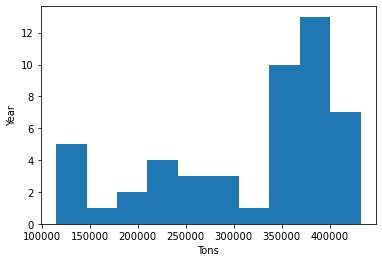

In [971]:
plt.hist(us_mushroom_df['Value'])
plt.xlabel('Tons')
plt.ylabel('Year')
plt.show()

Text(0.5, 0, '')

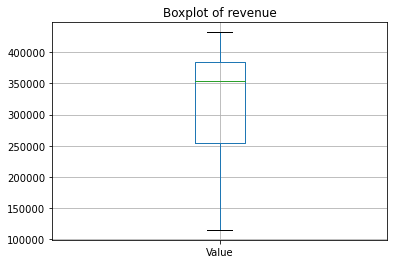

In [972]:
us_mushroom_df.boxplot('Value')
plt.title('Boxplot of revenue')
plt.xlabel('')

In [973]:
mean = stats.mean(us_mushroom_df["Value"])
sd = stats.stdev(us_mushroom_df["Value"])
revenue = us_mushroom_df["Value"]

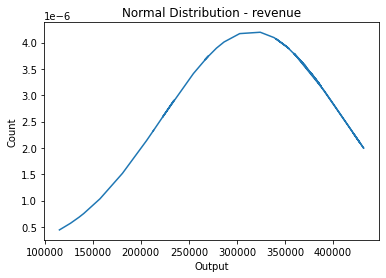

In [974]:
#normal distribution
plt.plot(revenue,norm.pdf(revenue,mean,sd))
plt.title("Normal Distribution - revenue")
plt.xlabel("Output")
plt.ylabel("Count")
plt.show()

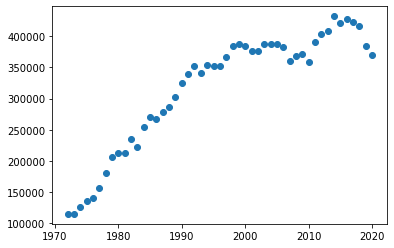

In [975]:
#basic scatter plot to see potential correlation between year and revenue
plt.scatter(us_mushroom_df["Year"],us_mushroom_df["Value"])

plotting large correlation heatmap to see how variables are linked. 
year and currency correlation (0.84) is the highest 

<AxesSubplot:>

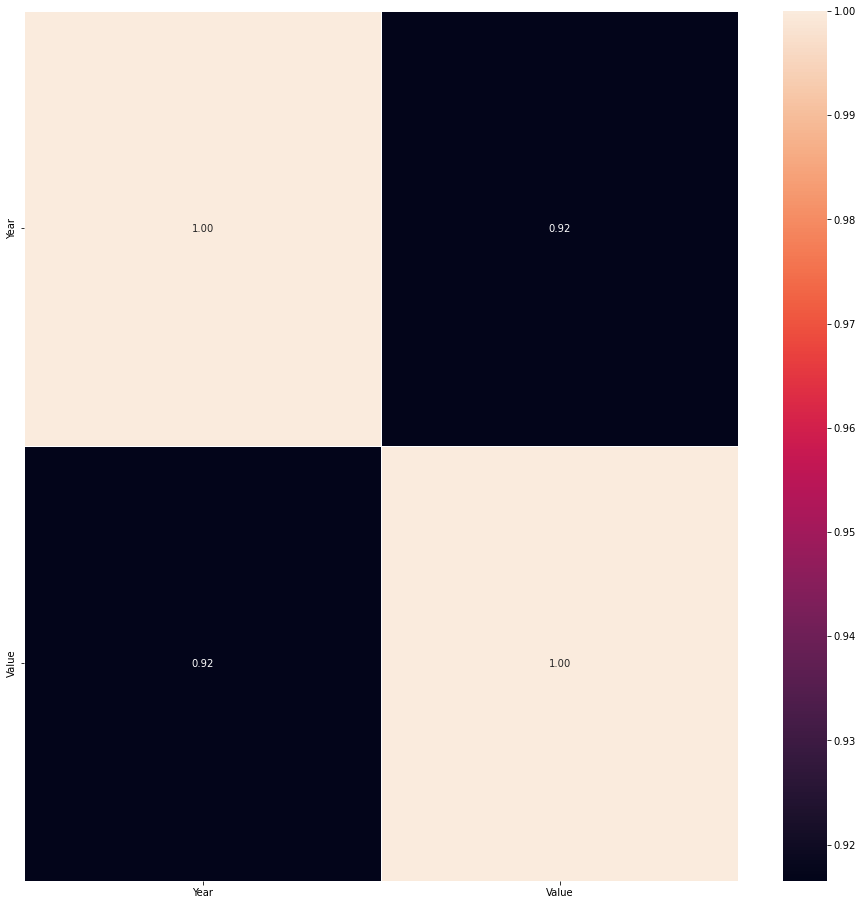

In [976]:
plt.figure(figsize = (16,16))
sns.heatmap(us_mushroom_df.corr(), annot = True, fmt = '.2f', linewidths = 0.5)

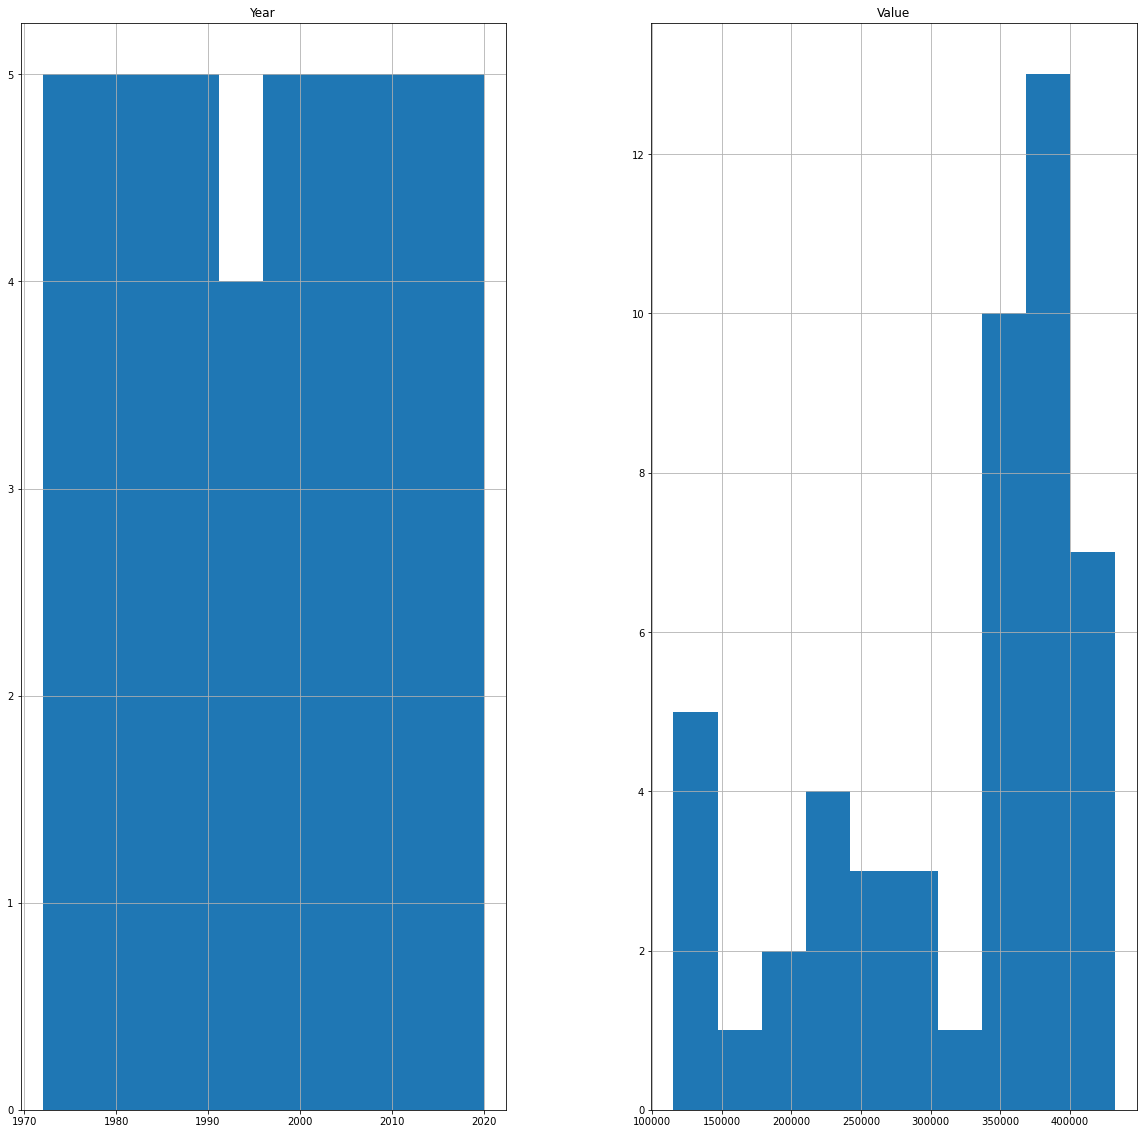

In [977]:
# histograms of each variable 
fig = plt.figure(figsize = (20,20))             
ax = fig.gca()                                
us_mushroom_df.hist(ax = ax)                          
plt.show()

In [978]:
us_mushroom_df_scaled = us_mushroom_df.copy()

In [979]:
#applying standard scalar to copy of main df to bring all variables into a similar scale

scaler = StandardScaler()

us_mushroom_df_scaled = pd.DataFrame(scaler.fit_transform(us_mushroom_df),columns=us_mushroom_df.columns)

us_mushroom_df_scaled.head()

,Year,Value
0,-1.697056,-2.143609
1,-1.626346,-2.143599
2,-1.555635,-2.020282
3,-1.484924,-1.925518
4,-1.414214,-1.873587


In [980]:
#making another copy of main df scaled in case this all goes wrong
us_mushroom_df_scaled_temp = us_mushroom_df_scaled.copy()

In [981]:
#applying function to EUR$ column to get new column for target outcomes for ML algorithms- checking tail to see if it worked
us_mushroom_df_scaled_temp = triennial_delta(us_mushroom_df_scaled_temp,"Value")
us_mushroom_df_scaled_temp.tail()

,Year,Value,predictor
44,1.414214,1.191681,0.0
45,1.484924,1.142992,0.0
46,1.555635,1.065026,NaN
47,1.626346,0.722765,NaN
48,1.697056,0.576859,NaN


In [982]:
# also checking head to be 100% 
us_mushroom_df_scaled_temp.head()

,Year,Value,predictor
0,-1.697056,-2.143609,1.0
1,-1.626346,-2.143599,1.0
2,-1.555635,-2.020282,1.0
3,-1.484924,-1.925518,1.0
4,-1.414214,-1.873587,1.0


In [983]:
#creating new df without predictor column for x_test
X = us_mushroom_df_scaled_temp.drop(["predictor"],axis=1)

#creating df last_3_rows to store the last 3 rows which will be used to predict future years based on algorithms
last_3_rows = X.tail(3)

#dropping last 3 rows from X as they aren't going to be used yet
X = X.drop(X.index[[-1,-2,-3]])


In [984]:
#creating df y with target answers, dropping last 3 rows but storing for later use
y = us_mushroom_df_scaled_temp["predictor"]
y = y.drop(y.index[[-1,-2,-3]])

In [985]:
#splitting data into X and Y training and testing at a 0.3 split- random state set for reproducability
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state= 7)

#making sure shapes make sense
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(X.shape)
print(y.shape)

Y_test.head(6)

(32, 2)
(14, 2)
(32,)
(14,)
(46, 2)
(46,)


13    1.0
20    1.0
15    1.0
18    1.0
22    1.0
34    0.0
Name: predictor, dtype: float64

In [986]:
#Storing KNN classifier as clf and fitting to training data
clf = sklearn.neighbors.KNeighborsClassifier()
clf.fit(X_train,Y_train)
print(clf)

KNeighborsClassifier()


In [987]:
#perfirming KNN classification and looking at classification report
#recall = 86% accuracy
y_expect = Y_test
y_pred = clf.predict(X_test)

print(metrics.classification_report(y_expect, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75         4
         1.0       0.90      0.90      0.90        10

    accuracy                           0.86        14
   macro avg       0.82      0.82      0.82        14
weighted avg       0.86      0.86      0.86        14



In [988]:
#Revenue - KNN
#applying KNN algorithm to last 3 rows that were dropped earlier to predict whether there is an increase or not in revenue for 2021/2022/2023

actual_predictions =  clf.predict(last_3_rows)
print(actual_predictions)

[0. 1. 1.]


It predics no increse from 2019 for 2022
It predics a increse from 2020 for 2023
It predics a increse from 2021 for 2024

In [989]:
#now performing Logistic regression in revenue predictions

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

LogisticRegression()

In [990]:
#creating confusion matrix to show Success and error types in logistic regression

y_pred_log_reg = log_reg.predict(X_test)
confusion_matrix(Y_test, y_pred_log_reg)

array([[ 1,  3],
       [ 0, 10]], dtype=int64)

1 True positives, 3 true negatives, 0 false positive, 10 false negative 

In [991]:
#Revenue - Log Reg - using the trained logistic regression algorithm on the last 3 rows of data to predict future revenue changes

actual_predictions =  log_reg.predict(last_3_rows)
print(actual_predictions)



[0. 0. 1.]


 It predics no increse from 2019 for 2022
 It predics no increse from 2020 for 2023
 It predics a increse from 2021 for 2024

In [992]:
#Applying PCA to data, using top 2 components, 
pca = PCA(n_components = 2)

# Performing Pca on the 3 dfs.
PCA_X_train = pca.fit_transform(X_train)
PCA_X_test = pca.transform(X_test)
PCA_rows = pca.transform(last_3_rows)
 
# Store the explained variance
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[0.97424677 0.02575323]


[0.97424677 0.02575323]


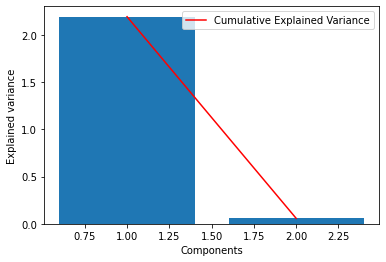

In [993]:
#graphing variance of the 2 components chosen
plt.bar(range(1,len(pca.explained_variance_ ) + 1), pca.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1, len(pca.explained_variance_ ) + 1), pca.explained_variance_,
         c = 'red',
         label = "Cumulative Explained Variance")
plt.legend(loc = 'best')

print(explained_variance)

In [994]:
# Repeating logistic regression steps, but now on the 2 principal components as opposed to whole df
log_reg.fit(PCA_X_train, Y_train)
y_pred_log_reg = log_reg.predict(PCA_X_test)
confusion_matrix(Y_test, y_pred_log_reg)

array([[ 1,  3],
       [ 0, 10]], dtype=int64)

In [995]:
#using trained logistic regression model on data to predict future revenue changes
actual_predictions =  log_reg.predict(PCA_rows)
print(actual_predictions)

[0. 0. 1.]


# Using interactive graphs 

In [996]:
pip install pandas-bokeh

Note: you may need to restart the kernel to use updated packages.


In [997]:
import pandas as pd
import pandas_bokeh

In [998]:
pandas_bokeh.output_notebook()

Loading BokehJS ...

### Comparing Irish Revenue in Mushrooms in Euros vs Dollar

In [999]:
mushroom_value

,Year,EUR$,Rate,US$
512,1990,57.1,1.066116,60.875224
513,1991,63.5,1.066116,67.698366
514,1992,64.8,1.066116,69.084317
515,1993,68.1,1.066116,72.602500
516,1994,76.3,1.066116,81.344651
517,1995,78.0,1.066116,83.157048
518,1996,92.3,1.066116,98.402507
519,1997,101.9,1.066116,108.637220
520,1998,106.7,1.066116,113.754577
521,1999,111.4,1.066116,118.765322


In [1000]:
mushroom_value_bokeh = mushroom_value
mushroom_value_bokeh.index = mushroom_value_bokeh['Year']
mushroom_value_bokeh.plot_bokeh.line()

Figure(id='1876', ...)

### Pie chart displaying the amount of mushrooms produced in US

In [1001]:
us_mushroom_df_bokeh = us_mushroom_df
us_mushroom_df_bokeh.index=us_mushroom_df_bokeh['Year']
us_mushroom_df_bokeh.plot_bokeh.pie(y ='Value')

__x__values_original


Figure(id='2136', ...)